In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import matplotlib.dates as mdates

from IPython.display import display
from matplotlib.widgets import Slider

In [2]:
data = pd.read_csv('item_064.csv')

In [3]:
data.head()

,item_id,store_id,date_id,cnt,item_id_without_store,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
0,STORE_1_064,STORE_1,1,0,64,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,STORE_1_064,STORE_1,2,1,64,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,STORE_1_064,STORE_1,3,0,64,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,STORE_1_064,STORE_1,4,0,64,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,0,1,1
4,STORE_1_064,STORE_1,5,0,64,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,1,0


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819 entries, 0 to 1818
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   item_id                1819 non-null   object
 1   store_id               1819 non-null   object
 2   date_id                1819 non-null   int64 
 3   cnt                    1819 non-null   int64 
 4   item_id_without_store  1819 non-null   int64 
 5   date                   1819 non-null   object
 6   wm_yr_wk               1819 non-null   int64 
 7   weekday                1819 non-null   object
 8   wday                   1819 non-null   int64 
 9   month                  1819 non-null   int64 
 10  year                   1819 non-null   int64 
 11  event_name_1           146 non-null    object
 12  event_type_1           146 non-null    object
 13  event_name_2           4 non-null      object
 14  event_type_2           4 non-null      object
 15  CASHBACK_STORE_1     

In [5]:
print('cnt: \n',data['cnt'].unique())

print('\nevent_name_1\n',data['event_name_1'].unique())
print('\nevent_type_1\n',data['event_type_1'].unique())

print('\nevent_name_2\n',data['event_name_2'].unique())
print('\nevent_type_2\n',data['event_type_2'].unique())

cnt: 
 [0 1 2 3 6 4 5 7]

event_name_1
 [nan 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter']

event_type_1
 [nan 'Sporting' 'Cultural' 'National' 'Religious']

event_name_2
 [nan 'Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"]

event_type_2
 [nan 'Cultural' 'Religious']


In [6]:
print(data['wm_yr_wk'].unique()) #единица-год-№недели в году

[11101 11102 11103 11104 11105 11106 11107 11108 11109 11110 11111 11112
 11113 11114 11115 11116 11117 11118 11119 11120 11121 11122 11123 11124
 11125 11126 11127 11128 11129 11130 11131 11132 11133 11134 11135 11136
 11137 11138 11139 11140 11141 11142 11143 11144 11145 11146 11147 11148
 11149 11150 11151 11152 11201 11202 11203 11204 11205 11206 11207 11208
 11209 11210 11211 11212 11213 11214 11215 11216 11217 11218 11219 11220
 11221 11222 11223 11224 11225 11226 11227 11228 11229 11230 11231 11232
 11233 11234 11235 11236 11237 11238 11239 11240 11241 11242 11243 11244
 11245 11246 11247 11248 11249 11250 11251 11252 11301 11302 11303 11304
 11305 11306 11307 11308 11309 11310 11311 11312 11313 11314 11315 11316
 11317 11318 11319 11320 11321 11322 11323 11324 11325 11326 11327 11328
 11329 11330 11331 11332 11333 11334 11335 11336 11337 11338 11339 11340
 11341 11342 11343 11344 11345 11346 11347 11348 11349 11350 11351 11352
 11353 11401 11402 11403 11404 11405 11406 11407 11

## 1. Количество продаж товара за указанный период


In [7]:
# Преобразование колонок 'date' и 'cnt' в списки (вне pipeline)
dates_list = data['date'].tolist()  # Преобразуем даты в список
sales_list = data['cnt'].tolist()   # Преобразуем количество продаж в список

In [8]:
# Pipeline функция, которая принимает списки дат и продаж, запрашивает период и возвращает данные для построения графика 
# количество продаж товара за указанный период

def sales_pipeline(dates, sales):
    """
    Принимает два списка: даты и количество продаж.
    
    Вход:
    - dates: Список с датами (должен быть тип np.array или list).
    - sales: Список с количеством продаж (должен быть тип np.array или list).
    
    Выход:
    - Массивы дат и продаж для построения графика, отфильтрованные по введенному пользователем периоду.
    """
    
    # Проверка, что входные данные являются списками или массивами
    if not isinstance(dates, (list, np.ndarray)) or not isinstance(sales, (list, np.ndarray)):
        raise ValueError("На вход должны подаваться списки или массивы.")
    
    # Преобразуем списки в numpy массивы для удобства
    dates = pd.to_datetime(np.array(dates))  # Преобразуем даты в формат datetime
    sales = np.array(sales)
    
    # Запрашиваем начальную и конечную дату у пользователя
    start_date = pd.to_datetime(input("Введите начальную дату в формате YYYY-MM-DD: "))
    end_date = pd.to_datetime(input("Введите конечную дату в формате YYYY-MM-DD: "))
    
    # Фильтрация данных по выбранному периоду
    mask = (dates >= start_date) & (dates <= end_date)
    filtered_dates = dates[mask]
    filtered_sales = sales[mask]
    
    # Возвращаем отфильтрованные данные для построения графика
    return filtered_dates, filtered_sales

In [9]:
# Функция для построения графика на основе данных
def plot_sales(dates, sales):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, sales, marker='o', linestyle='-', color='b')
    plt.title('Количество продаж товара за указанный период')
    plt.xlabel('Дата')
    plt.ylabel('Количество продаж')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [10]:
# Пример использования:
processed_dates, processed_sales = sales_pipeline(dates_list, sales_list)

Введите начальную дату в формате YYYY-MM-DD:  2011-01-01
Введите конечную дату в формате YYYY-MM-DD:  2011-04-01


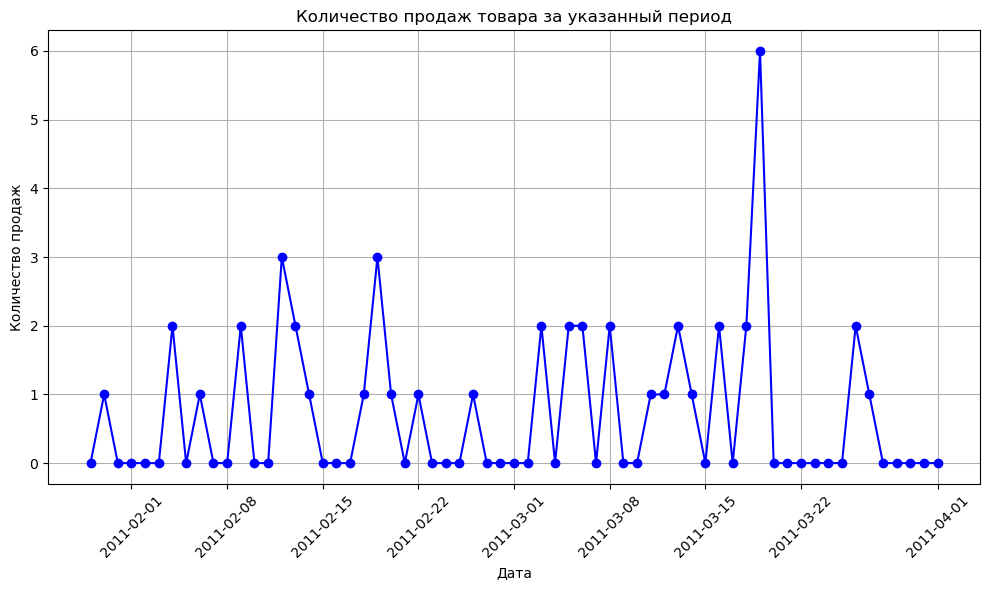

In [11]:
# Используем данные из pipeline для построения графика
plot_sales(processed_dates, processed_sales)

## 2. Рост или падение продаж в сравнении с предыдущим периодом (в %)

In [12]:
# Pipeline функция, которая принимает списки дат и продаж, запрашивает период и возвращает данные для построения графика процентного изменения продаж
def sales_pipeline(dates, sales):
    """
    Принимает два списка: даты и количество продаж.
    
    Вход:
    - dates: Список с датами (должен быть тип np.array или list).
    - sales: Список с количеством продаж (должен быть тип np.array или list).
    
    Выход:
    - Отфильтрованные массивы дат и процентное изменение продаж.
    """
    
    # Проверка, что входные данные являются списками или массивами
    if not isinstance(dates, (list, np.ndarray)) or not isinstance(sales, (list, np.ndarray)):
        raise ValueError("На вход должны подаваться списки или массивы.")
    
    # Преобразуем списки в numpy массивы для удобства
    dates = pd.to_datetime(np.array(dates))  # Преобразуем даты в формат datetime
    sales = np.array(sales)
    
    # Запрашиваем начальную и конечную дату у пользователя
    start_date = pd.to_datetime(input("Введите начальную дату в формате YYYY-MM-DD: "))
    end_date = pd.to_datetime(input("Введите конечную дату в формате YYYY-MM-DD: "))
    
    # Фильтрация данных по выбранному периоду
    mask = (dates >= start_date) & (dates <= end_date)
    filtered_dates = dates[mask]
    filtered_sales = sales[mask]
    
    # Рассчитываем процентное изменение продаж
    with np.errstate(divide='ignore', invalid='ignore'):  # Игнорируем деление на ноль
        sales_pct_change = np.where(
            filtered_sales[:-1] == 0, 
            0,  # Если предыдущие продажи равны нулю, то изменение считается 0%
            np.diff(filtered_sales) / filtered_sales[:-1] * 100
        )
    
    # Возвращаем отфильтрованные данные и процентное изменение
    return filtered_dates[1:], sales_pct_change

In [13]:
# Пример использования:
processed_dates, sales_change = sales_pipeline(dates_list, sales_list)

Введите начальную дату в формате YYYY-MM-DD:  2011-01-01
Введите конечную дату в формате YYYY-MM-DD:  2011-04-01


### 2.0. Динамический график скользящего среднего  (если нужно показать общую тенденцию без резких скачков)

#### Особенности графика:

1) Сглаживание данных:

Используется динамическое окно сглаживания, которое выбирается на основе длины периода:

* Для периода больше 243 дней — окно сглаживания на 30 дней.
* Для периода от 30 до 243 дней — окно на 7 дней.
* Для периода от 14 до 30 дней — окно на 3 дня.
* Для коротких периодов (менее 14 дней) сглаживание не применяется.

В легенде графика отображается информация о том, что значения усредняются на выбранное количество дней. Если сглаживание не применяется, в легенде указано "Без сглаживания"

2) Отображение меток для данных:

Для каждой точки на графике выводятся метки с процентами изменения продаж. Однако, чтобы график не перегружался информацией, повторяющиеся значения в ряду отображаются только для первой и последней точки в ряду одинаковых значений.

3) Гибкость в обработке данных:

Если все данные о продажах равны 0, вместо построения обычного графика рисуется жирная линия на уровне 0% с текстом "0%" по центру графика. Это помогает избежать пустых графиков при отсутствии изменений в данных.
Если данных недостаточно (например, пустой массив дат или данных), график строится с предупреждением "Недостаточно данных" и жирной линией на уровне 0%

In [14]:
# Функция для выбора размера окна на основе длины периода
def get_window_size(dates):
    if len(dates) == 0:  # Проверяем, что массив дат не пустой
        return 0
    period_length = (dates[-1] - dates[0]).days  # Длина периода в днях
    
    if period_length >= 243:
        return 30  # Окно для годовых периодов — 30 дней
    elif 30 <= period_length < 243:
        return 7  # Окно для периодов от нескольких месяцев до года — 7 дней
    elif 14 <= period_length < 30:
        return 3  # Окно для периодов от нескольких недель до месяца — 3 дня
    else:
        return 0  # Для коротких периодов меньше недели — без скользящего окна

In [15]:
# Функция для сглаживания данных
def smooth_data(data, window_size):
    if window_size > 0 and len(data) >= window_size:  # Проверяем, достаточно ли данных для применения окна
        return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    else:
        return data  # Без сглаживания или если данных недостаточно для сглаживания

In [16]:
# Функция для построения графика с метками и проверкой на отсутствие изменений
def plot_sales_change_with_conditional_labels(dates, sales_change, smoothed=True):
    # Проверяем, есть ли изменения или все значения равны 0
    if np.all(sales_change == 0):
        # Если все изменения равны 0, строим график с константным значением 0%
        plt.figure(figsize=(10, 6))
        plt.axhline(y=0, color='g', linestyle='--', linewidth=3)  # Жирная линия на уровне 0%
        plt.text(0.5, 0.5, '0%', fontsize=20, va='bottom', ha='center', color='green', transform=plt.gca().transAxes)  # Центрируем надпись 0%
        plt.title('Изменений нет: константное значение 0%')
        plt.xlabel('Дата')
        plt.ylabel('Изменение продаж (%)')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        return  # Завершаем выполнение функции, чтобы не строить другой график

    # Если данных недостаточно, выводим предупреждение и строим график с константой
    if len(dates) == 0 or len(sales_change) == 0:
        plt.figure(figsize=(10, 6))
        plt.axhline(y=0, color='g', linestyle='--', linewidth=3)  # Жирная линия на уровне 0%
        plt.text(0.5, 0.5, 'Недостаточно данных: константа 0%', fontsize=20, va='bottom', ha='center', color='red', transform=plt.gca().transAxes)  # Центрируем надпись 0%
        plt.title('Недостаточно данных для построения графика')
        plt.xlabel('Дата')
        plt.ylabel('Изменение продаж (%)')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        return

    plt.figure(figsize=(10, 6))
    
    # Определяем размер окна для сглаживания
    window_size = get_window_size(dates)
    
    # Если используем сглаживание
    if smoothed and window_size > 0:
        smoothed_sales_change = smooth_data(sales_change, window_size)
        adjusted_dates = dates[len(dates) - len(smoothed_sales_change):]
        plt.plot(adjusted_dates, smoothed_sales_change, marker='o', linestyle='-', color='g', label=f'Усреднение на {window_size} дней')
    else:
        smoothed_sales_change = sales_change
        adjusted_dates = dates
        plt.plot(adjusted_dates, smoothed_sales_change, marker='o', linestyle='-', color='g', label='Без сглаживания')

    # Логика для отображения меток только на первом и последнем повторяющемся значении
    previous_value = None
    repeat_series_start = None

    for i, (date, change) in enumerate(zip(adjusted_dates, smoothed_sales_change)):
        if change == previous_value:
            if repeat_series_start is None:
                # Начало серии одинаковых значений
                repeat_series_start = i - 1
        else:
            if repeat_series_start is not None:
                # Конец серии одинаковых значений, отображаем первый и последний элемент серии
                plt.text(adjusted_dates[repeat_series_start], smoothed_sales_change[repeat_series_start], f'{smoothed_sales_change[repeat_series_start]:.1f}%', fontsize=9, ha='right', va='bottom')
                plt.text(adjusted_dates[i-1], smoothed_sales_change[i-1], f'{smoothed_sales_change[i-1]:.1f}%', fontsize=9, ha='right', va='bottom')
                repeat_series_start = None
            # Отображаем метку для нового значения
            plt.text(date, change, f'{change:.1f}%', fontsize=9, ha='right', va='bottom')

        previous_value = change

    # Обработка последней серии одинаковых значений, если она была в конце графика
    if repeat_series_start is not None:
        plt.text(adjusted_dates[repeat_series_start], smoothed_sales_change[repeat_series_start], f'{smoothed_sales_change[repeat_series_start]:.1f}%', fontsize=9, ha='right', va='bottom')
        plt.text(adjusted_dates[-1], smoothed_sales_change[-1], f'{smoothed_sales_change[-1]:.1f}%', fontsize=9, ha='right', va='bottom')

    # Добавляем подписи к осям и финальные настройки
    plt.title('Рост/падение продаж в сравнении с предыдущим периодом (%)')
    plt.xlabel('Дата')
    plt.ylabel('Изменение продаж (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')  # Добавляем легенду с информацией о сглаживании
    plt.tight_layout()
    plt.show()

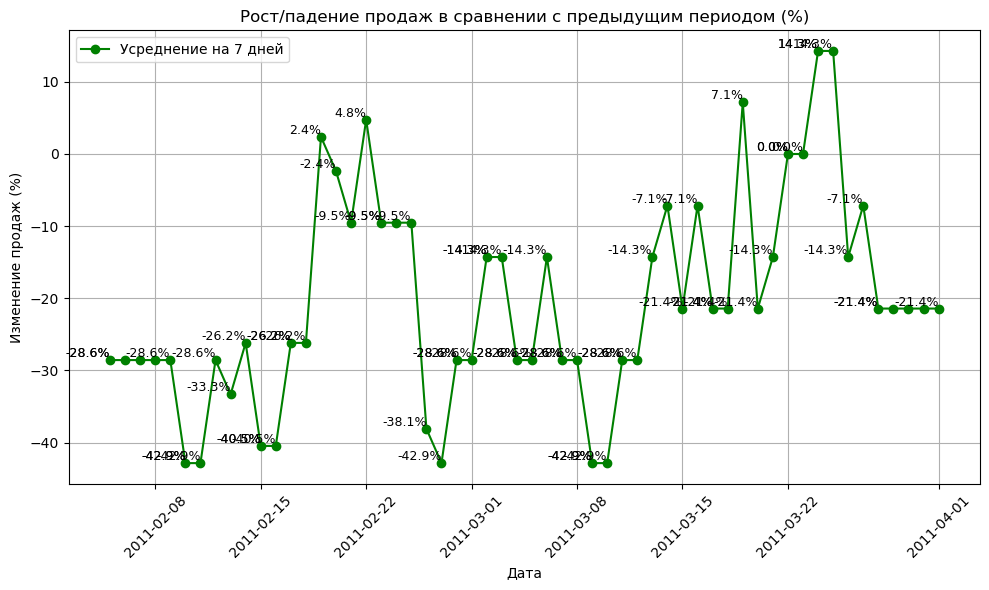

In [17]:
# Пример использования
plot_sales_change_with_conditional_labels(processed_dates, sales_change)

### 2.1. Сглаживание с помощью скользящей средней 
Не динамический, но есть скрытие повторяющихся меток

In [18]:
def smooth_data(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

In [19]:
# Функция для построения графика с условием отображения меток только для первой и последней точки в ряду одинаковых значений
def plot_sales_change_with_conditional_labels(dates, sales_change):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, sales_change, marker='o', linestyle='-', color='g')
    
    # Логика для отображения меток только на первом и последнем повторяющемся значении
    previous_value = None
    repeat_series_start = None
    
    for i, (date, change) in enumerate(zip(dates, sales_change)):
        if change == previous_value:
            if repeat_series_start is None:
                # Начало серии одинаковых значений
                repeat_series_start = i - 1
        else:
            if repeat_series_start is not None:
                # Конец серии одинаковых значений, отображаем первый и последний элемент серии
                plt.text(dates[repeat_series_start], sales_change[repeat_series_start], 
                         f'{sales_change[repeat_series_start]:.1f}%', fontsize=9, ha='right', va='bottom')
                plt.text(dates[i-1], sales_change[i-1], 
                         f'{sales_change[i-1]:.1f}%', fontsize=9, ha='right', va='bottom')
                repeat_series_start = None
            
            # Отображаем метку для нового значения
            plt.text(date, change, f'{change:.1f}%', fontsize=9, ha='right', va='bottom')
        
        previous_value = change
    
    # Обработка последней серии одинаковых значений, если она была в конце графика
    if repeat_series_start is not None:
        plt.text(dates[repeat_series_start], sales_change[repeat_series_start], 
                 f'{sales_change[repeat_series_start]:.1f}%', fontsize=9, ha='right', va='bottom')
        plt.text(dates[-1], sales_change[-1], 
                 f'{sales_change[-1]:.1f}%', fontsize=9, ha='right', va='bottom')
    
    plt.title('Рост/падение продаж в сравнении с предыдущим периодом (%)')
    plt.xlabel('Дата')
    plt.ylabel('Изменение продаж (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [20]:
# Применяем сглаживание данных
smoothed_sales_change = smooth_data(sales_change, window_size=7)

In [21]:
# Проверяем длины массивов и приводим их к одной длине
min_length = min(len(processed_dates), len(smoothed_sales_change))

# Обрезаем массивы до минимальной длины
adjusted_dates = processed_dates[-min_length:]
smoothed_sales_change = smoothed_sales_change[-min_length:]

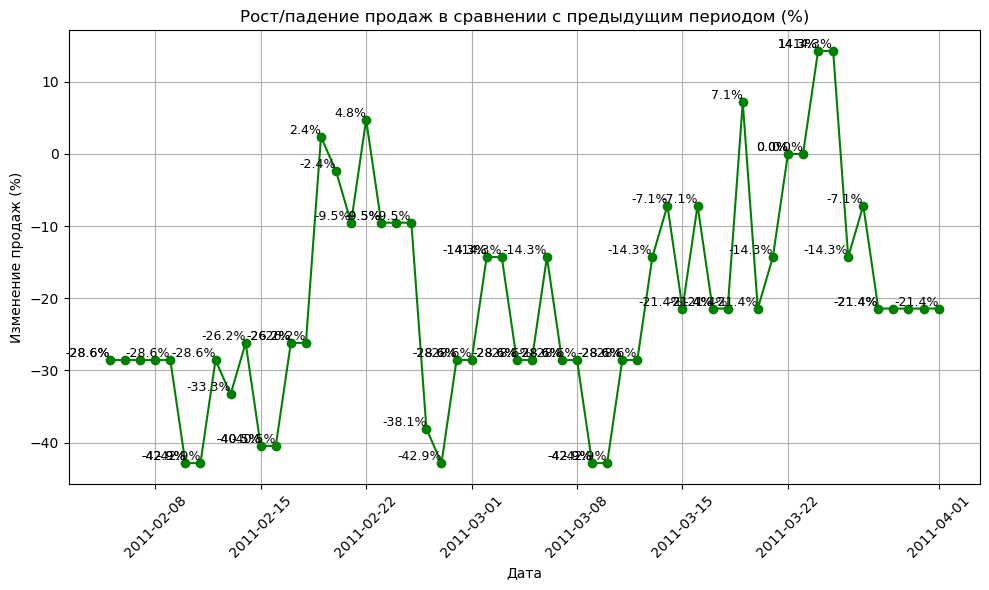

In [22]:
# Вызов функции построения графика
plot_sales_change_with_conditional_labels(adjusted_dates, smoothed_sales_change)

### 2.2 График процентные изменения продаж по сравнению с предыдущим периодом для каждого дня (без скользящего окна)

In [23]:
# Функция для построения графика процентного изменения продаж с условием отображения нулей
def plot_sales_change_with_conditional_labels(dates, sales_change):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, sales_change, marker='o', linestyle='-', color='g')

    # Логика для отображения меток только на первом и последнем нуле в серии
    previous_value = None
    zero_series_start = None

    for i, (date, change) in enumerate(zip(dates, sales_change)):
        if change == 0:
            if previous_value != 0:
                # Начало серии нулей
                plt.text(date, change, f'{change:.1f}%', fontsize=9, ha='right', va='bottom')
                zero_series_start = i
        else:
            if previous_value == 0 and zero_series_start is not None:
                # Конец серии нулей, отображаем последний ноль
                plt.text(dates[zero_series_start], sales_change[zero_series_start], f'{0:.1f}%', fontsize=9, ha='right', va='bottom')
                plt.text(dates[i-1], sales_change[i-1], f'{0:.1f}%', fontsize=9, ha='right', va='bottom')
            # Отображаем метку для ненулевых значений
            plt.text(date, change, f'{change:.1f}%', fontsize=9, ha='right', va='bottom')

        previous_value = change

    # Обработка последней серии нулей, если график закончился на нулях
    if previous_value == 0 and zero_series_start is not None:
        plt.text(dates[zero_series_start], sales_change[zero_series_start], f'{0:.1f}%', fontsize=9, ha='right', va='bottom')
        plt.text(dates[-1], sales_change[-1], f'{0:.1f}%', fontsize=9, ha='right', va='bottom')

    plt.title('Рост/падение продаж в сравнении с предыдущим периодом (%)')
    plt.xlabel('Дата')
    plt.ylabel('Изменение продаж (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

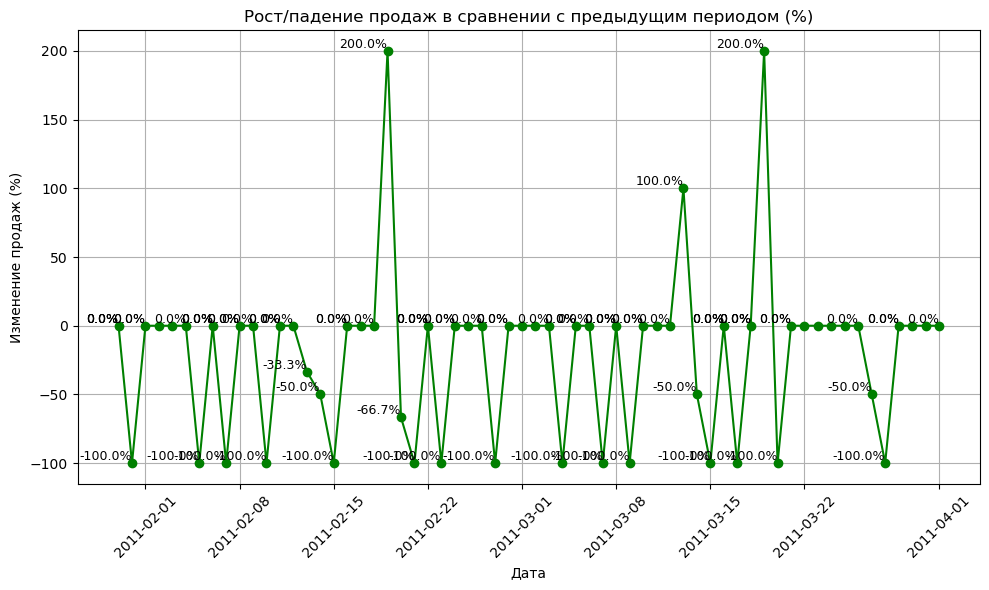

In [24]:
# Используем данные для построения графика с условием
plot_sales_change_with_conditional_labels(processed_dates, sales_change)

## 3. Скорость продажи товара (как быстро распродаются товары)

In [25]:
# Подготовка данных из датасета
dates = pd.to_datetime(data['date']).tolist()  # Преобразуем колонку 'date' в список дат
sales = data['cnt'].tolist()  # Количество продаж

In [26]:
def sales_pipeline(dates, sales):
    # Рассчитываем скорость продаж
    speed_sales = pd.Series(sales).diff().fillna(0).abs().tolist()
    
    # Рассчитываем суммарные продажи
    cumulative_sales = pd.Series(sales).cumsum().tolist()
    
    return dates, sales, speed_sales, cumulative_sales

In [27]:
# Вызов пайплайна для получения данных
dates, sales, speed_sales, cumulative_sales = sales_pipeline(dates, sales)

In [28]:
# Функция для построения графика динамики продаж
def plot_sales(dates, sales):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, sales, label='Динамика продаж')
    plt.xlabel('Дата')
    plt.ylabel('Продажи')
    plt.title('Динамика продаж товара')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

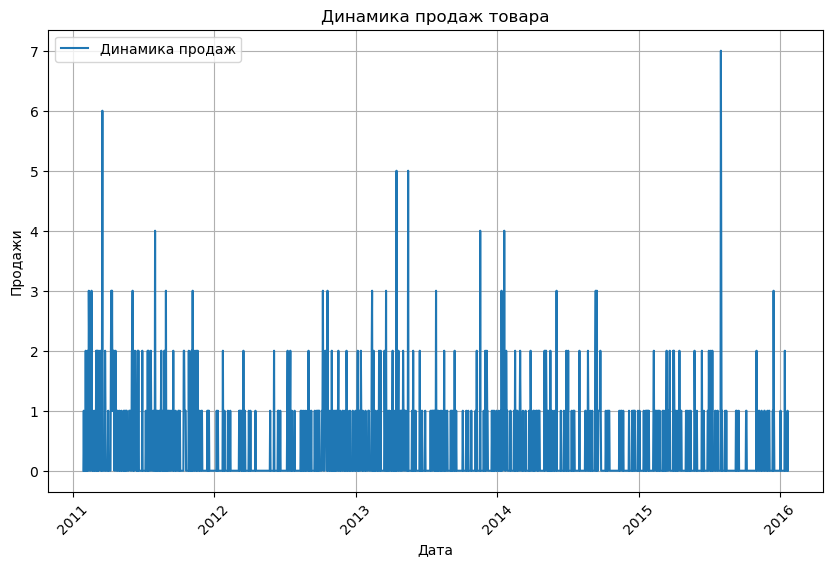

In [29]:
plot_sales(dates, sales)

In [30]:
# Функция для построения графика скорости продаж
def plot_speed_sales(dates, speed_sales):
    plt.figure(figsize=(10, 6))
    plt.bar(dates, speed_sales, label='Скорость продаж', color='orange')
    plt.xlabel('Дата')
    plt.ylabel('Скорость продаж')
    plt.title('Скорость продажи товара (изменение продаж по дням)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

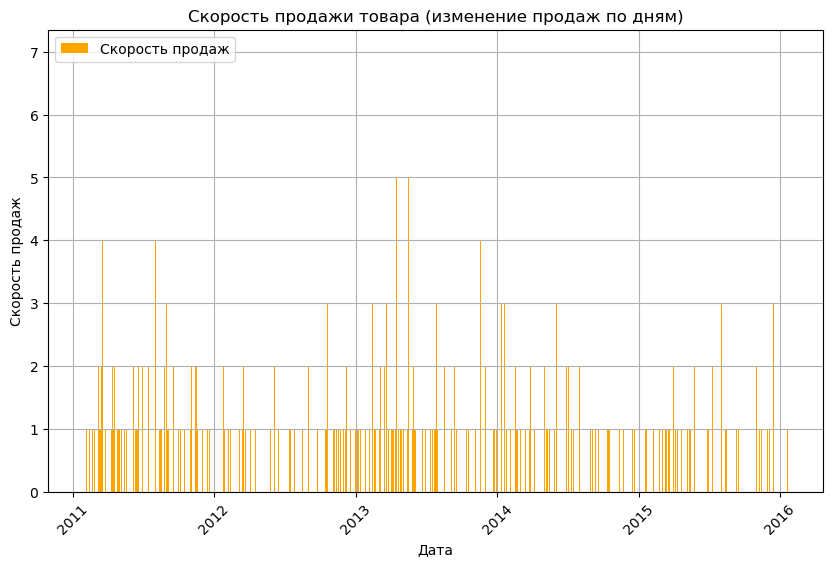

In [31]:
plot_speed_sales(dates, speed_sales)

In [32]:
# Функция для построения графика суммарных продаж
def plot_cumulative_sales(dates, cumulative_sales):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, cumulative_sales, label='Суммарные продажи', color='green')
    plt.xlabel('Дата')
    plt.ylabel('Накопительные продажи')
    plt.title('Накопительные продажи товара')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

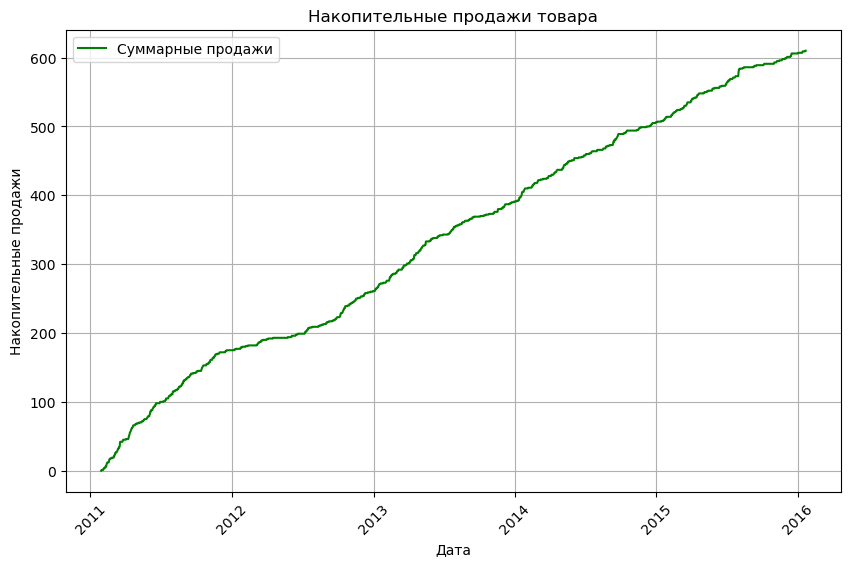

In [33]:
plot_cumulative_sales(dates, cumulative_sales)

In [34]:
# Интерактивный график для изменения интервалов (по кварталам, месяцам, неделям)
def plot_sales_interactive(dates, sales, interval='M'):
    df = pd.DataFrame({'date': dates, 'sales': sales})
    df.set_index('date', inplace=True)
    df_resampled = df.resample(interval).sum().reset_index()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(df_resampled['date'], df_resampled['sales'], color=['green' if x >= 0 else 'red' for x in df_resampled['sales']])
    
    ax.set_xlabel('Дата')
    ax.set_ylabel('Скорость продаж (единиц/квартал)')
    ax.set_title('Скорость продажи товара по кварталам')
    plt.xticks(rotation=45)
    
    # Настраиваем слайдер для выбора интервала
    ax_interval = plt.axes([0.2, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')
    slider = Slider(ax_interval, 'Интервал (M: месяц, Q: квартал, W: неделя)', 1, 3, valinit=1, valstep=1)
    
    def update(val):
        new_interval = 'M' if slider.val == 1 else ('Q' if slider.val == 2 else 'W')
        df_resampled = df.resample(new_interval).sum().reset_index()
        ax.clear()
        bars = ax.bar(df_resampled['date'], df_resampled['sales'], color=['green' if x >= 0 else 'red' for x in df_resampled['sales']])
        ax.set_xlabel('Дата')
        ax.set_ylabel('Скорость продаж (единиц/квартал)')
        ax.set_title(f'Скорость продажи товара по {new_interval}')
        plt.xticks(rotation=45)
        fig.canvas.draw_idle()

    slider.on_changed(update)
    
    plt.show()

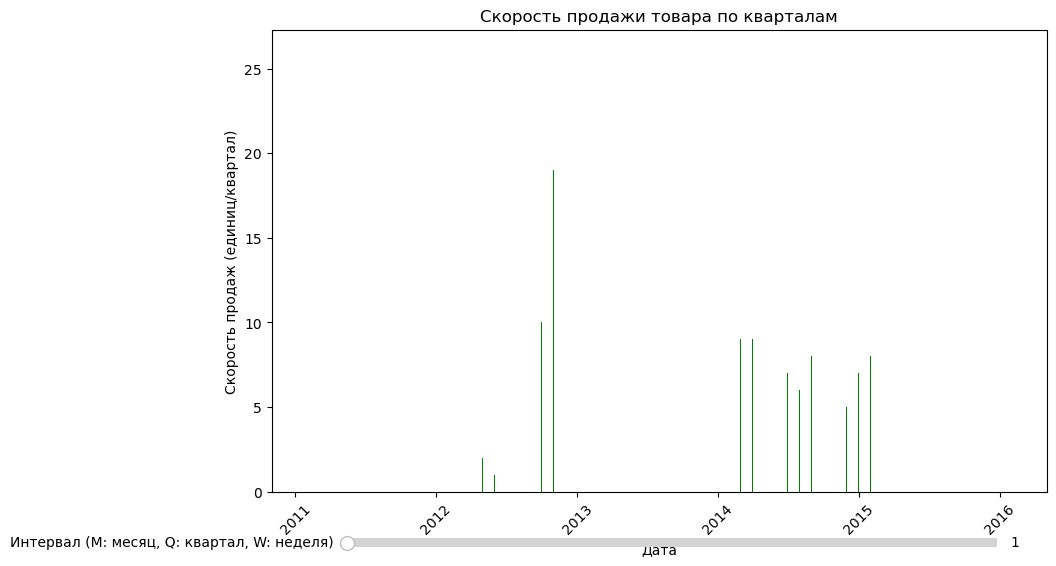

In [35]:
plot_sales_interactive(dates, sales, interval='ME')

Введите интервал (M: месяц, Q: квартал, W: неделя):  M
Введите начальную дату (в формате YYYY-MM-DD):  2011-01-01
Введите конечную дату (в формате YYYY-MM-DD):  2014-05-01


C:\Users\Anastasia\AppData\Local\Temp\ipykernel_7060\1189473371.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df_filtered.resample(interval).sum().reset_index()


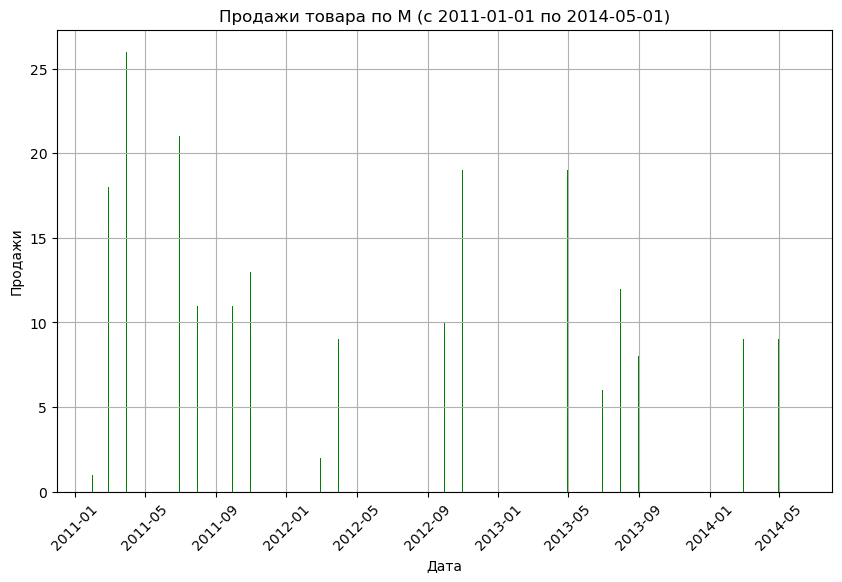

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Интерактивный график для изменения интервалов и выбора отрезка дат
def plot_sales_interactive_console(dates, sales):
    # Запрос интервала у пользователя
    interval = input('Введите интервал (M: месяц, Q: квартал, W: неделя): ').strip().upper()
    
    if interval not in ['M', 'Q', 'W']:
        print('Неверный интервал. Пожалуйста, введите M, Q или W.')
        return
    
    # Запрос периода у пользователя
    start_date = input('Введите начальную дату (в формате YYYY-MM-DD): ')
    end_date = input('Введите конечную дату (в формате YYYY-MM-DD): ')
    
    # Преобразуем введённые даты
    try:
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
    except ValueError:
        print('Неверный формат даты. Пожалуйста, введите дату в формате YYYY-MM-DD.')
        return
    
    # Фильтрация данных по введённому периоду
    df = pd.DataFrame({'date': dates, 'sales': sales})
    df['date'] = pd.to_datetime(df['date'])
    df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    if df_filtered.empty:
        print('Нет данных для выбранного периода.')
        return
    
    # Агрегация данных по выбранному интервалу
    df_filtered.set_index('date', inplace=True)
    df_resampled = df_filtered.resample(interval).sum().reset_index()
    
    # Строим график
    plt.figure(figsize=(10, 6))
    plt.bar(df_resampled['date'], df_resampled['sales'], color=['green' if x >= 0 else 'red' for x in df_resampled['sales']])
    
    plt.xlabel('Дата')
    plt.ylabel('Продажи')
    plt.title(f'Продажи товара по {interval} (с {start_date.date()} по {end_date.date()})')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Пример вызова интерактивного графика
plot_sales_interactive_console(dates, sales)

In [37]:
# Интерактивный график для изменения интервалов и выбора отрезка дат с учётом отрицательных значений
def plot_sales_interactive_console_negative(dates, sales):
    # Запрос интервала у пользователя
    interval = input('Введите интервал (M: месяц, Q: квартал, W: неделя): ').strip().upper()
    
    if interval not in ['M', 'Q', 'W']:
        print('Неверный интервал. Пожалуйста, введите M, Q или W.')
        return
    
    # Запрос периода у пользователя
    start_date = input('Введите начальную дату (в формате YYYY-MM-DD): ')
    end_date = input('Введите конечную дату (в формате YYYY-MM-DD): ')
    
    # Преобразуем введённые даты
    try:
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
    except ValueError:
        print('Неверный формат даты. Пожалуйста, введите дату в формате YYYY-MM-DD.')
        return
    
    # Фильтрация данных по введённому периоду
    df = pd.DataFrame({'date': dates, 'sales': sales})
    df['date'] = pd.to_datetime(df['date'])
    df_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    if df_filtered.empty:
        print('Нет данных для выбранного периода.')
        return
    
    # Агрегация данных по выбранному интервалу
    df_filtered.set_index('date', inplace=True)
    df_resampled = df_filtered.resample(interval).sum().reset_index()
    
    # Строим график с выделением отрицательных и положительных значений
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_resampled['date'], df_resampled['sales'], color=['green' if x >= 0 else 'red' for x in df_resampled['sales']])
    
    # Добавляем подписи над столбцами
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}', ha='center', va='bottom' if yval >= 0 else 'top')
    
    plt.xlabel('Дата')
    plt.ylabel('Скорость продаж (единиц/интервал)')
    plt.title(f'Скорость продажи товара по {interval} (с {start_date.date()} по {end_date.date()})')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

Введите интервал (M: месяц, Q: квартал, W: неделя):  Q
Введите начальную дату (в формате YYYY-MM-DD):  2011-01-01
Введите конечную дату (в формате YYYY-MM-DD):  2013-01-01


C:\Users\Anastasia\AppData\Local\Temp\ipykernel_7060\2691563746.py:33: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_resampled = df_filtered.resample(interval).sum().reset_index()


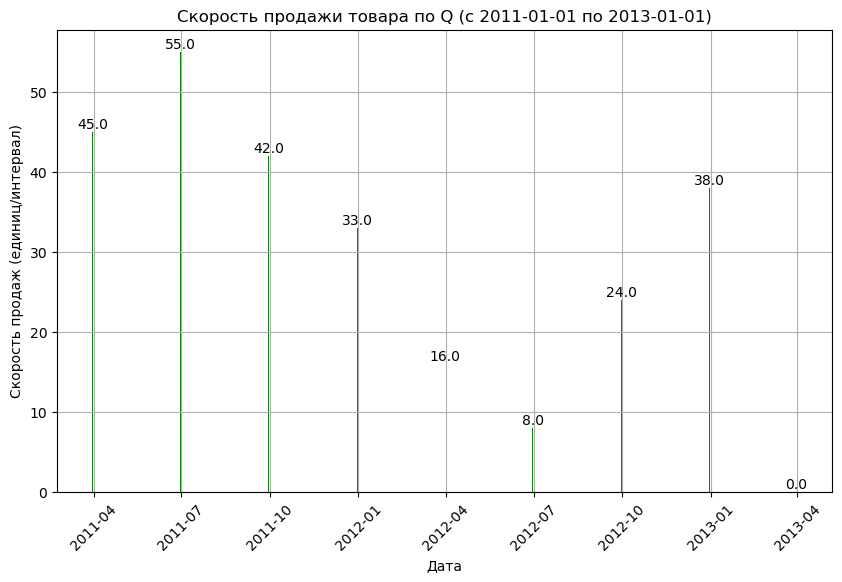

In [38]:
plot_sales_interactive_console_negative(dates, sales)

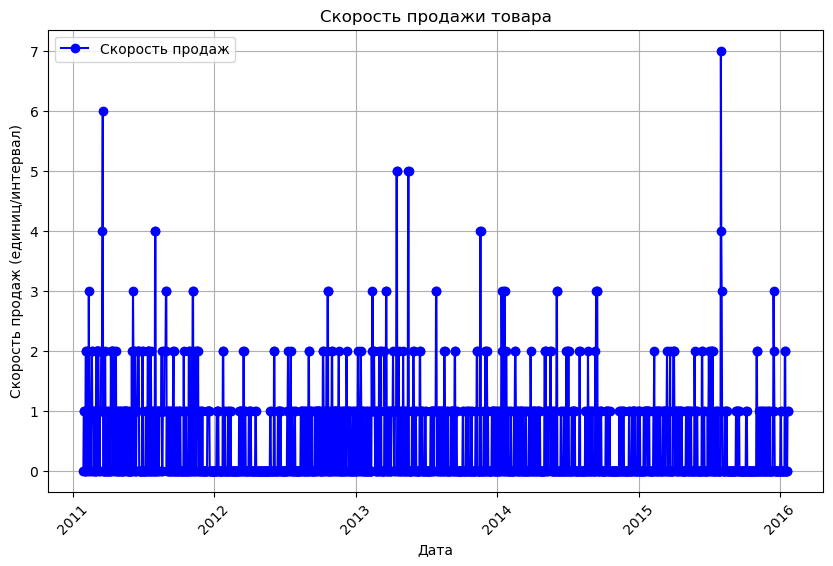

In [39]:
def plot_speed_sales_line(dates, speed_sales):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, speed_sales, marker='o', linestyle='-', color='blue', label='Скорость продаж')
    plt.xlabel('Дата')
    plt.ylabel('Скорость продаж (единиц/интервал)')
    plt.title('Скорость продажи товара')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()

# Пример вызова
plot_speed_sales_line(dates, speed_sales)

In [40]:
# Пайплайн для расчёта скорости продаж
def sales_speed_pipeline(dates, sales):
    # Преобразуем даты в формате datetime и продажу в тип для удобства вычислений
    dates = pd.to_datetime(dates)
    sales = np.array(sales)
    
    # Рассчитываем скорость продаж как разницу между продажами в соседние дни
    sales_speed = np.diff(sales) / np.diff(dates.astype('datetime64[D]').astype(int))
    
    # Возвращаем отфильтрованные даты и рассчитанную скорость продаж
    return dates[1:], sales_speed

In [41]:
# Функция для создания агрегированных данных по продажам
def sales_pipeline(dates, sales, period='M'):
    data = pd.DataFrame({'Date': dates, 'Sales': sales})
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    
    # Ресемплирование данных по указанному периоду
    resampled_data = data.resample(period).sum()
    
    return resampled_data.index, resampled_data['Sales']

In [42]:
# Функция для построения графика
def plot_sales_chart(dates, sales, title):
    plt.figure(figsize=(12, 6))
    plt.plot(dates, sales, marker='o', linestyle='-', color='b')
    
    # Добавление меток на точки
    for i, sale in enumerate(sales):
        plt.text(dates[i], sale, f'{sale:.1f}', fontsize=9, ha='center', va='bottom' if sale >= 0 else 'top', color='black')

    plt.title(title)
    plt.xlabel('Дата')
    plt.ylabel('Количество продаж')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [43]:
# Ввод данных от пользователя
def user_input():
    year = input("Введите год, за который хотите посмотреть данные: ")
    mode = input("Введите 'M' для отображения данных по месяцам или 'W' для отображения по неделям: ").upper()
    
    return int(year), mode

In [44]:
# Основная функция
def main():
    # Получение ввода от пользователя
    year, period = user_input()
    
    # Фильтрация данных по выбранному году
    filtered_data = data[data['year'] == year]
    
    # Агрегация по выбранному периоду (месяц или неделя)
    if period == 'M':
        title = f'График продаж за {year} по месяцам'
    elif period == 'W':
        title = f'График продаж за {year} по неделям'
    
    # Получение данных через пайплайн
    processed_dates, sales = sales_pipeline(filtered_data['date'], filtered_data['cnt'], period=period)
    
    # Построение графика на основе данных
    plot_sales_chart(processed_dates, sales, title)

Введите год, за который хотите посмотреть данные:  2012
Введите 'M' для отображения данных по месяцам или 'W' для отображения по неделям:  M


C:\Users\Anastasia\AppData\Local\Temp\ipykernel_7060\3840199039.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_data = data.resample(period).sum()


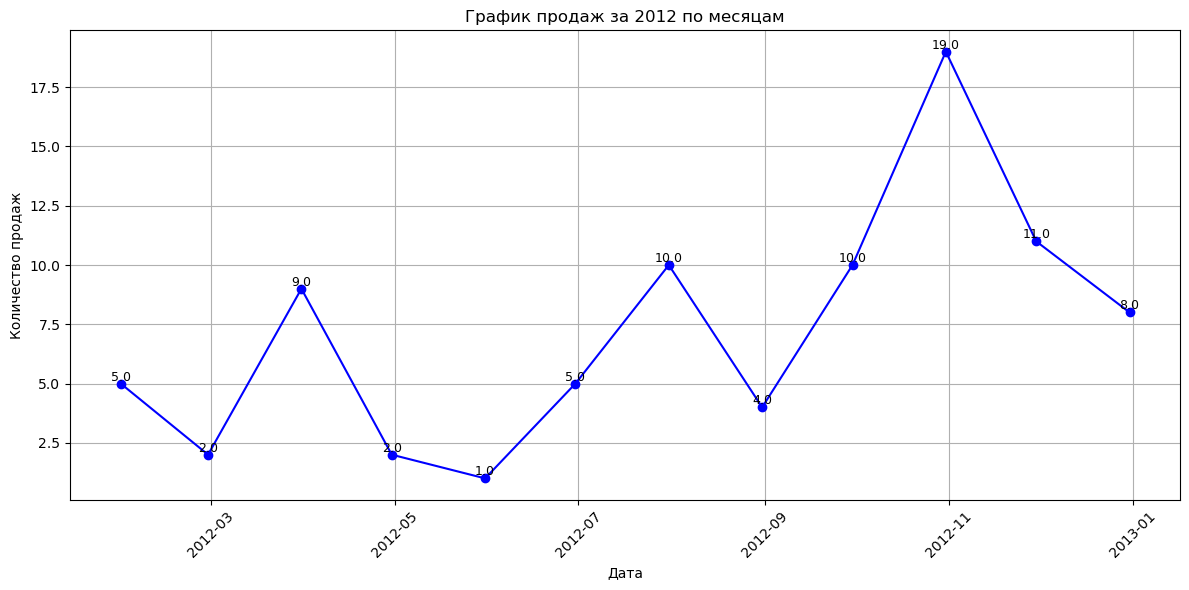

In [45]:
# Запуск программы
main()

In [46]:
# Функция для создания агрегированных данных по продажам
def sales_speed_pipeline(dates_list, sales_list, period='Q'):
    # Преобразуем даты в DateTime и работаем с ними
    data = pd.DataFrame({'Date': dates_list, 'Sales': sales_list})
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    
    # Агрегация по выбранному периоду (месяц, квартал, год)
    resampled_data = data.resample(period).sum()

    return resampled_data.index, resampled_data['Sales']

In [47]:
# Функция для построения столбчатого графика
def plot_sales_bar_chart(dates, sales_speed):
    plt.figure(figsize=(10, 6))
    
    # Задаем цвета для положительных и отрицательных изменений
    colors = ['g' if speed >= 0 else 'r' for speed in sales_speed]
    
    # Построение столбчатого графика
    plt.bar(dates, sales_speed, color=colors, width=80, align='center')
    
    # Добавление меток на столбцы
    for i, speed in enumerate(sales_speed):
        plt.text(dates[i], speed, f'{speed:.1f}', fontsize=9, ha='center', va='bottom' if speed >= 0 else 'top', color='black')
    
    # Настройка графика
    plt.title("Скорость продажи товара по кварталам")
    plt.xlabel('Дата')
    plt.ylabel('Скорость продаж (единиц/квартал)')
    plt.grid(True, axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [48]:
# Функция для пользовательского ввода данных
def user_input():
    start_date = input("Введите начальную дату в формате YYYY-MM-DD: ")
    end_date = input("Введите конечную дату в формате YYYY-MM-DD: ")
    
    # Преобразуем строки в формат дат
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Выбор периода агрегации (например, М - для месяцев, Q - для кварталов, A - для годов)
    period = input("Введите период агрегации (например, 'M' для месяцев, 'Q' для кварталов, 'A' для годов): ").upper()
    
    return start_date, end_date, period


In [49]:
# Основная функция
def main():
    # Получаем данные от пользователя
    start_date, end_date, period = user_input()

    # Фильтрация данных по выбранному периоду
    filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    
    # Генерация данных на основе выбранного пользователем периода
    processed_dates, sales_speed = sales_speed_pipeline(filtered_data['date'], filtered_data['cnt'], period)
    
    # Построение графика на основе данных
    plot_sales_bar_chart(processed_dates, sales_speed)


In [50]:
data['date'] = pd.to_datetime(data['date'])

Введите начальную дату в формате YYYY-MM-DD:  2011-01-01
Введите конечную дату в формате YYYY-MM-DD:  2013-01-01
Введите период агрегации (например, 'M' для месяцев, 'Q' для кварталов, 'A' для годов):  Q


C:\Users\Anastasia\AppData\Local\Temp\ipykernel_7060\859857149.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resampled_data = data.resample(period).sum()


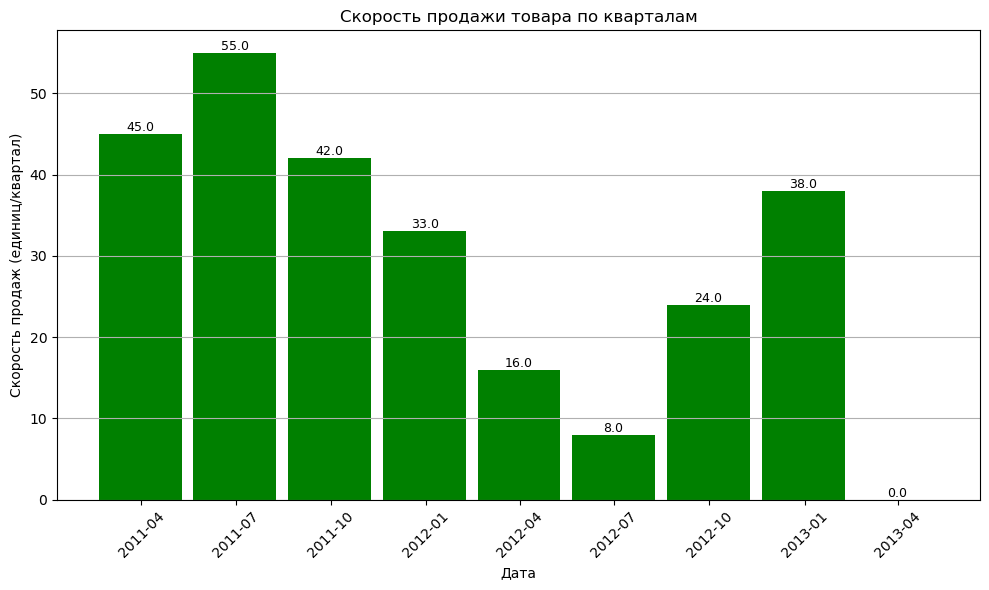

In [51]:
main()

In [52]:
# Функция для создания агрегированных данных по продажам и расчёта скорости с использованием скользящего окна
def sales_speed_pipeline_moving_average(dates_list, sales_list, period='Q'):
    # Преобразуем даты в DateTime и работаем с ними
    data = pd.DataFrame({'Date': dates_list, 'Sales': sales_list})
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    
    # Агрегация по выбранному периоду (месяц, квартал, год)
    resampled_data = data.resample(period).sum()
    
    # Вычисление изменений относительно предыдущего значения (скользящее окно)
    resampled_data['Sales_Change'] = resampled_data['Sales'].diff()

    return resampled_data.index, resampled_data['Sales_Change']

In [53]:
# Функция для построения столбчатого графика
def plot_sales_bar_chart(dates, sales_speed):
    plt.figure(figsize=(10, 6))
    
    # Задаем цвета для положительных и отрицательных изменений
    colors = ['g' if speed >= 0 else 'r' for speed in sales_speed]
    
    # Построение столбчатого графика
    plt.bar(dates, sales_speed, color=colors, width=80, align='center')
    
    # Добавление меток на столбцы
    for i, speed in enumerate(sales_speed):
        plt.text(dates[i], speed, f'{speed:.1f}', fontsize=9, ha='center', va='bottom' if speed >= 0 else 'top', color='black')
    
    # Настройка графика
    plt.title("Скорость продажи товара по кварталам с использованием скользящего окна")
    plt.xlabel('Дата')
    plt.ylabel('Изменение скорости продаж (единиц/квартал)')
    plt.grid(True, axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [54]:
# Функция для пользовательского ввода данных
def user_input():
    start_date = input("Введите начальную дату в формате YYYY-MM-DD: ")
    end_date = input("Введите конечную дату в формате YYYY-MM-DD: ")
    
    # Преобразуем строки в формат дат
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Выбор периода агрегации (например, М - для месяцев, Q - для кварталов, A - для годов)
    period = input("Введите период агрегации (например, 'M' для месяцев, 'Q' для кварталов, 'A' для годов): ").upper()
    
    return start_date, end_date, period


In [55]:
# Основная функция
def main():
    # Получаем данные от пользователя
    start_date, end_date, period = user_input()

    # Фильтрация данных по выбранному периоду
    filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
    
    # Генерация данных на основе выбранного пользователем периода
    processed_dates, sales_speed = sales_speed_pipeline_moving_average(filtered_data['date'], filtered_data['cnt'], period)
    
    # Построение графика на основе данных
    plot_sales_bar_chart(processed_dates, sales_speed)

In [56]:
data['date'] = pd.to_datetime(data['date'])

Введите начальную дату в формате YYYY-MM-DD:  2011-01-01
Введите конечную дату в формате YYYY-MM-DD:  2013-01-01
Введите период агрегации (например, 'M' для месяцев, 'Q' для кварталов, 'A' для годов):  Q


C:\Users\Anastasia\AppData\Local\Temp\ipykernel_7060\935618234.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resampled_data = data.resample(period).sum()
posx and posy should be finite values
posx and posy should be finite values


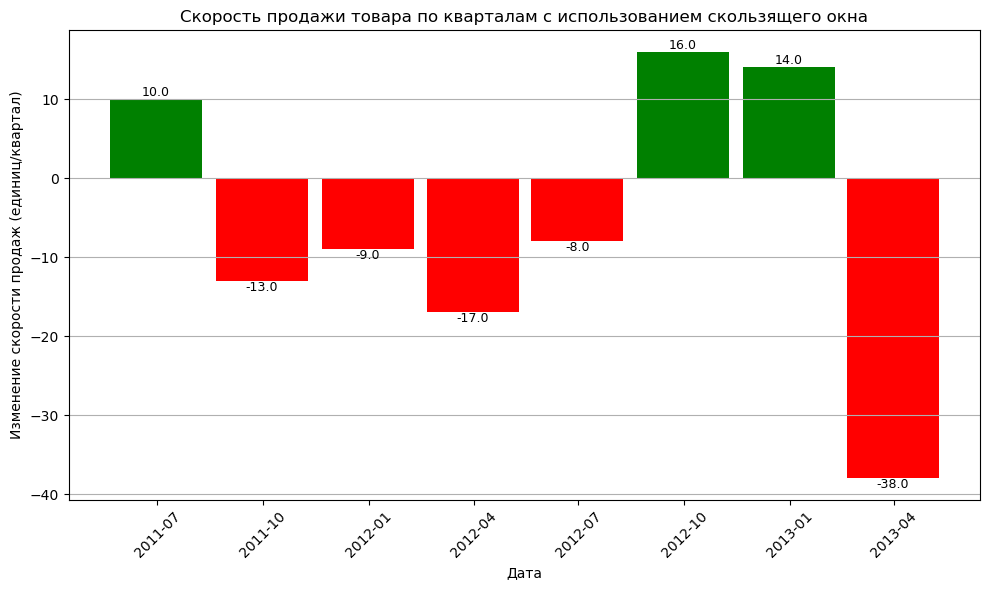

In [57]:
main()

### 3.1 Общий вид

In [58]:
# Функция для построения графика скорости продаж
def plot_sales_speed(dates, sales_speed):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, sales_speed, marker='o', linestyle='-', color='b')
    
    # Добавляем метки на график
    for i, speed in enumerate(sales_speed):
        plt.text(dates[i], speed, f'{speed:.1f}', fontsize=9, ha='right', va='bottom')
    
    # Настройки графика
    plt.title('Скорость продажи товара (как быстро распродаются товары)')
    plt.xlabel('Дата')
    plt.ylabel('Скорость продажи (единиц/день)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [59]:

# Передаем данные о продажах в пайплайн для расчета скорости
processed_dates, sales_speed = sales_speed_pipeline(dates_list, sales_list)

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_7060\859857149.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resampled_data = data.resample(period).sum()


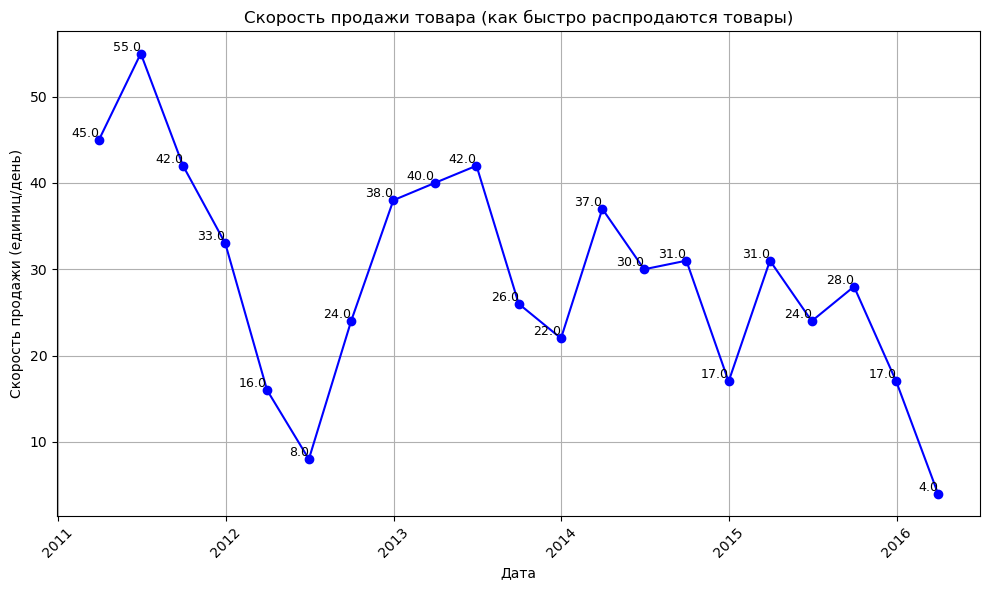

In [60]:
# Построение графика скорости продаж
plot_sales_speed(processed_dates, sales_speed)

### 3.2 Разбиение по месяцам и усреднение

In [61]:
# Преобразуем данные в pandas DataFrame для удобства работы с датами
def sales_speed_pipeline(dates, sales, period='M'):
    # Преобразуем даты и продажи в pandas
    data = pd.DataFrame({'Date': dates, 'Sales': sales})
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Устанавливаем столбец 'Date' в качестве индекса
    data.set_index('Date', inplace=True)
    
    # Ресэмплируем данные на выбранный период (месяц 'M', квартал 'Q', год 'Y')
    resampled_data = data.resample(period).sum()
    
    # Рассчитываем скорость продаж (разница между месяцами)
    sales_speed = resampled_data['Sales'].diff()

    return resampled_data.index[1:], sales_speed[1:]

In [62]:
# Функция для построения графика с усреднением
def plot_sales_speed(dates, sales_speed):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, sales_speed, marker='o', linestyle='-', color='b')
    
    # Добавляем метки на график
    for i, speed in enumerate(sales_speed):
        plt.text(dates[i], speed, f'{speed:.1f}', fontsize=9, ha='right', va='bottom')
    
    # Настройки графика
    plt.title('Скорость продажи товара (усреднение по месяцам)')
    plt.xlabel('Дата')
    plt.ylabel('Скорость продажи (единиц/месяц)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [63]:
# Пример использования:
# Передаем данные о продажах в пайплайн с разбивкой по месяцам
processed_dates, sales_speed = sales_speed_pipeline(dates_list, sales_list, period='M')

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_7060\1726969346.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_data = data.resample(period).sum()


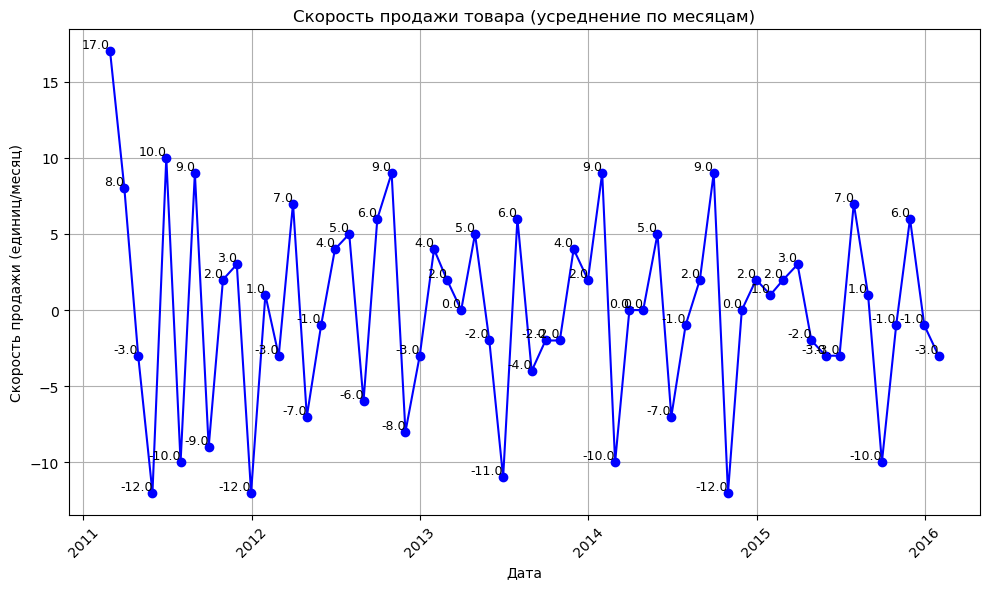

In [64]:
# Построение графика скорости продаж
plot_sales_speed(processed_dates, sales_speed)

### 3.3 Скользящее среднее (сглаживание)

In [65]:
# Функция для расчета скользящего среднего
def calculate_moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

# Функция для построения графика со скользящим средним
def plot_sales_speed_with_moving_average(dates, sales_speed, window_size=3):
    # Рассчитываем скользящее среднее
    smoothed_sales_speed = calculate_moving_average(sales_speed, window_size)
    
    plt.figure(figsize=(10, 6))
    plt.plot(dates, smoothed_sales_speed, marker='o', linestyle='-', color='b', label=f'Скользящее среднее ({window_size} месяцев)')
    
    # Настройки графика
    plt.title('Скорость продажи товара (сглаживание)')
    plt.xlabel('Дата')
    plt.ylabel('Скорость продажи (единиц/месяц)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

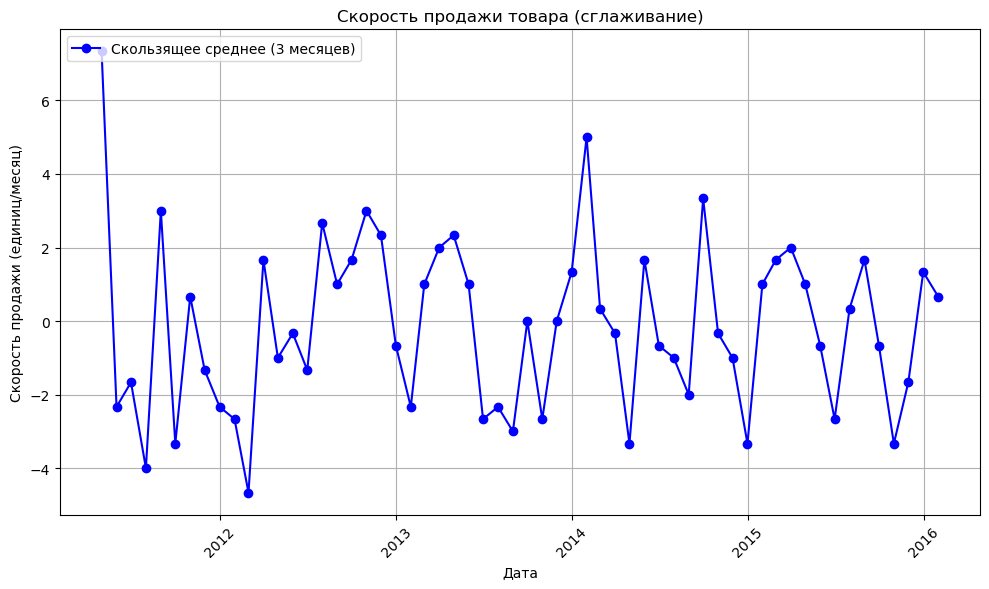

In [66]:
# Пример использования:
plot_sales_speed_with_moving_average(processed_dates, sales_speed, window_size=3)

### 3.4 Разбиение по кварталам

In [67]:
# Разбиение по кварталам и построение графика
processed_dates, sales_speed_quarter = sales_speed_pipeline(dates_list, sales_list, period='Q')

C:\Users\Anastasia\AppData\Local\Temp\ipykernel_7060\1726969346.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  resampled_data = data.resample(period).sum()


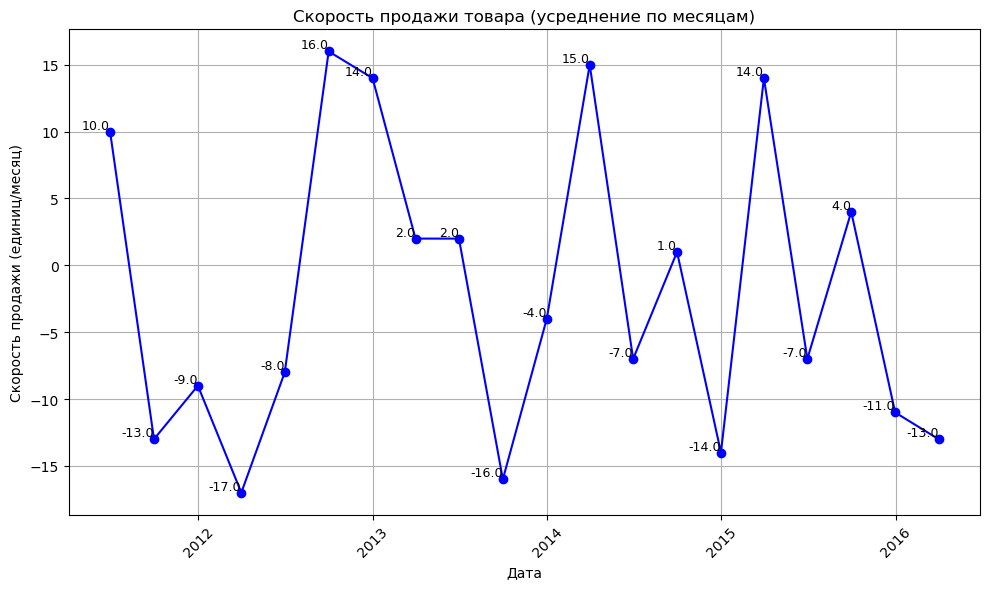

In [68]:
# Построение графика для данных с разбиением по кварталам
plot_sales_speed(processed_dates, sales_speed_quarter)

## 4. Пики продаж (месяц)

In [69]:
# Функция для расчета пиков продаж по месяцам
def sales_peaks_pipeline(dates, sales, period='M'):
    # Преобразуем даты и продажи в pandas DataFrame
    data = pd.DataFrame({'Date': dates, 'Sales': sales})
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Устанавливаем 'Date' как индекс для работы с временными рядами
    data.set_index('Date', inplace=True)
    
    # Ресэмплируем данные по месяцам и находим максимальные продажи за месяц
    monthly_peaks = data.resample(period).max()

    # Возвращаем месяцы и пики продаж
    return monthly_peaks.index, monthly_peaks['Sales']

### 4.1  Диаграмма с накоплением (Area Chart) — по годам сетка

In [70]:
# Функция для построения диаграммы с накоплением по годам в сетке 2x3
def plot_sales_peaks_area_grid(dates, sales_peaks):
    # Преобразуем даты и продажи в pandas DataFrame для удобства фильтрации по годам
    data = pd.DataFrame({'Date': dates, 'Sales': sales_peaks})
    data['Year'] = data['Date'].dt.year
    unique_years = data['Year'].unique()
    
    # Определяем количество строк и столбцов для сетки (2x3)
    rows, cols = 2, 3
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    
    # Убираем лишние оси, если лет меньше 6
    axes = axes.flatten()
    for ax in axes[len(unique_years):]:
        ax.set_visible(False)

    # Построение графиков по годам
    for i, year in enumerate(unique_years):
        yearly_data = data[data['Year'] == year]
        axes[i].fill_between(yearly_data['Date'], yearly_data['Sales'], color='b', alpha=0.3)
        axes[i].plot(yearly_data['Date'], yearly_data['Sales'], marker='o', color='b')

        # Добавляем метки на график
        for j, peak in enumerate(yearly_data['Sales']):
            axes[i].text(yearly_data['Date'].iloc[j], peak, f'{peak:.1f}', fontsize=9, ha='right', va='bottom')

        # Настройки каждого графика
        axes[i].set_title(f'Пики продаж за {year}')
        axes[i].set_xlabel('Месяц')
        axes[i].set_ylabel('Максимальные продажи (единиц/месяц)')
        axes[i].grid(True)
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [71]:
# Пример использования:
plot_sales_peaks_area_grid(processed_dates, monthly_peaks)

NameError: name 'monthly_peaks' is not defined

### 4.2 Круговая диаграмма (Pie Chart) — по годам сетка

In [ ]:
# Функция для построения круговой диаграммы пиков продаж по годам в сетке 2x3
def plot_sales_peaks_pie_grid(dates, sales_peaks):
    # Преобразуем даты и продажи в pandas DataFrame для удобства фильтрации по годам
    data = pd.DataFrame({'Date': dates, 'Sales': sales_peaks})
    data['Year'] = data['Date'].dt.year
    unique_years = data['Year'].unique()
    
    # Определяем количество строк и столбцов для сетки (2x3)
    rows, cols = 2, 3
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    
    # Убираем лишние оси, если лет меньше 6
    axes = axes.flatten()
    for ax in axes[len(unique_years):]:
        ax.set_visible(False)

    # Построение круговых диаграмм по годам
    for i, year in enumerate(unique_years):
        yearly_data = data[data['Year'] == year]
        axes[i].pie(yearly_data['Sales'], labels=[date.strftime('%b') for date in yearly_data['Date']], autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f'Доля пиков продаж за {year}')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Пример использования:
plot_sales_peaks_pie_grid(processed_dates, monthly_peaks)

### 4.3 Обычный

In [ ]:
# Функция для построения графика пиков продаж
def plot_sales_peaks(dates, sales_peaks):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, sales_peaks, marker='o', linestyle='-', color='b')

    # Добавляем метки на график
    for i, peak in enumerate(sales_peaks):
        plt.text(dates[i], peak, f'{peak:.1f}', fontsize=9, ha='right', va='bottom')
    
    # Настройки графика
    plt.title('Пики продаж (месяц)')
    plt.xlabel('Дата')
    plt.ylabel('Максимальные продажи (единиц/месяц)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Пример использования:
# Применяем пайплайн для нахождения пиков продаж по месяцам
processed_dates, monthly_peaks = sales_peaks_pipeline(dates_list, sales_list, period='M')

In [ ]:
# Построение графика пиков продаж
plot_sales_peaks(processed_dates, monthly_peaks)

### 4.4 Столбчатая диаграмма (Bar Chart)

In [ ]:
# Функция для построения столбчатого графика пиков продаж
def plot_sales_peaks_bar(dates, sales_peaks):
    plt.figure(figsize=(10, 6))
    
    # Построение столбчатого графика
    plt.bar(dates, sales_peaks, color='b', width=20)

    # Добавляем метки на столбцы
    for i, peak in enumerate(sales_peaks):
        plt.text(dates[i], peak, f'{peak:.1f}', fontsize=9, ha='center', va='bottom')
    
    # Настройки графика
    plt.title('Пики продаж (месяц)')
    plt.xlabel('Дата')
    plt.ylabel('Максимальные продажи (единиц/месяц)')
    plt.grid(True, axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Пример использования:
plot_sales_peaks_bar(processed_dates, monthly_peaks)

### 4.5 Диаграмма с накоплением (Area Chart)

In [ ]:
# Функция для построения диаграммы с накоплением
def plot_sales_peaks_area(dates, sales_peaks):
    plt.figure(figsize=(10, 6))
    
    # Построение диаграммы с накоплением
    plt.fill_between(dates, sales_peaks, color='b', alpha=0.3)
    plt.plot(dates, sales_peaks, marker='o', color='b')

    # Добавляем метки на график
    for i, peak in enumerate(sales_peaks):
        plt.text(dates[i], peak, f'{peak:.1f}', fontsize=9, ha='right', va='bottom')
    
    # Настройки графика
    plt.title('Пики продаж (месяц)')
    plt.xlabel('Дата')
    plt.ylabel('Максимальные продажи (единиц/месяц)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Пример использования:
plot_sales_peaks_area(processed_dates, monthly_peaks)

### 4.5 Круговая диаграмма (Pie Chart)

In [ ]:
# Функция для построения круговой диаграммы пиков продаж
def plot_sales_peaks_pie(dates, sales_peaks):
    plt.figure(figsize=(8, 8))
    
    # Построение круговой диаграммы
    plt.pie(sales_peaks, labels=[date.strftime('%Y-%m') for date in dates], autopct='%1.1f%%', startangle=90)
    
    # Настройки графика
    plt.title('Доля пиков продаж по месяцам')
    plt.tight_layout()
    plt.show()

In [ ]:
# Пример использования:
plot_sales_peaks_pie(processed_dates, monthly_peaks)

## 5. Пики продаж (день)

На бэке подумать про возможность наложения друг на друга разных периодов с прозрачностью 
(ниже покажу как пример, только в итоге пользователь сам с помощью крутилок будет выбирать, что накладывать для сравнения)

In [ ]:
# Функция для расчета пиков продаж по дням
def sales_peaks_daily_pipeline(dates, sales):
    # Преобразуем даты и продажи в pandas DataFrame
    data = pd.DataFrame({'Date': dates, 'Sales': sales})
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Устанавливаем 'Date' как индекс для работы с временными рядами
    data.set_index('Date', inplace=True)
    
    # Группируем данные по дням и находим максимальные продажи за каждый день
    daily_peaks = data.resample('D').max()

    # Возвращаем дни и пики продаж
    return daily_peaks.index, daily_peaks['Sales']

### 5.1 Общий

In [ ]:
# Функция для построения графика пиков продаж по дням
def plot_sales_peaks_daily(dates, sales_peaks):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, sales_peaks, marker='o', linestyle='-', color='b')

    # Добавляем метки на график
    for i, peak in enumerate(sales_peaks):
        plt.text(dates[i], peak, f'{peak:.1f}', fontsize=9, ha='right', va='bottom')
    
    # Настройки графика
    plt.title('Пики продаж (день)')
    plt.xlabel('Дата')
    plt.ylabel('Максимальные продажи (единиц/день)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
# Пример использования:
# Применяем пайплайн для нахождения пиков продаж по дням
processed_dates, daily_peaks = sales_peaks_daily_pipeline(dates_list, sales_list)

In [ ]:
# Построение графика пиков продаж по дням
plot_sales_peaks_daily(processed_dates, daily_peaks)

### 5.2 Немного интерактива

In [ ]:
# Функция для фильтрации по году и месяцам
def filter_sales_by_year(dates, sales, year):
    data = pd.DataFrame({'Date': dates, 'Sales': sales})
    data['Date'] = pd.to_datetime(data['Date'])
    data['Year'] = data['Date'].dt.year
    return data[data['Year'] == year]

In [ ]:
# Функция для отображения пиков по месяцам (по неделям)
def plot_sales_peaks_monthly_grid(data):
    months = data['Date'].dt.month.unique()
    rows, cols = 3, 4  # сетка 3 на 4
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten()

    for i, month in enumerate(months):
        monthly_data = data[data['Date'].dt.month == month]
        weekly_sales = monthly_data.resample('W', on='Date').max()
        
        axes[i].plot(weekly_sales.index, weekly_sales['Sales'], marker='o', linestyle='-', color='b')
        axes[i].set_title(f'Месяц {month}')
        axes[i].grid(True)
        axes[i].tick_params(axis='x', rotation=45)

    for ax in axes[len(months):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

In [ ]:
# Функция для отображения пиков по неделям (по дням)
def plot_sales_peaks_weekly_grid(data):
    months = data['Date'].dt.month.unique()
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # сетка 2 на 2
    axes = axes.flatten()

    for i, month in enumerate(months[:4]):  # только 4 недели
        weekly_data = data[data['Date'].dt.month == month].resample('W', on='Date').max()
        days_in_week = weekly_data.resample('D').max()

        axes[i].plot(days_in_week.index, days_in_week['Sales'], marker='o', linestyle='-', color='b')
        axes[i].set_title(f'Неделя {i+1} месяца {month}')
        axes[i].grid(True)
        axes[i].tick_params(axis='x', rotation=45)

    for ax in axes[len(months[:4]):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

In [ ]:
# Виджет для ввода начальной и конечной даты
start_date = widgets.DatePicker(
    description='Начальная дата',
    disabled=False
)
end_date = widgets.DatePicker(
    description='Конечная дата',
    disabled=False
)

In [ ]:
# Виджет для ввода списка продаж
sales_input = widgets.Text(
    description='Продажи (через запятую)',
    placeholder='Введите продажи через запятую'
)

In [ ]:
# Виджет для выбора года
year_selector = widgets.IntSlider(min=2011, max=2025, step=1, description='Год:', value=2011)

In [ ]:
# Виджет для выбора между месяцами и неделями
mode_selector = widgets.RadioButtons(
    options=['По месяцам', 'По неделям'],
    description='Отображение:',
    disabled=False
)

In [ ]:
# Функция-обработчик для обновления графиков
def update_graph(change):
    if start_date.value and end_date.value and sales_input.value:
        # Преобразуем продажи из ввода в список
        sales_list = list(map(int, sales_input.value.split(',')))

        # Генерируем список дат
        dates_list = pd.date_range(start=start_date.value, end=end_date.value)

        # Убедимся, что количество продаж соответствует количеству дней
        if len(sales_list) != len(dates_list):
            print("Количество продаж должно совпадать с количеством дней!")
            return

        # Выбираем год и режим отображения
        year = year_selector.value
        mode = mode_selector.value
        filtered_data = filter_sales_by_year(dates_list, sales_list, year)

        if mode == 'По месяцам':
            plot_sales_peaks_monthly_grid(filtered_data)
        elif mode == 'По неделям':
            plot_sales_peaks_weekly_grid(filtered_data)

In [ ]:
# Подключение обработчиков
year_selector.observe(update_graph, names='value')
mode_selector.observe(update_graph, names='value')

In [ ]:
# Кнопка для обновления графика по данным
update_button = widgets.Button(description='Обновить график')
update_button.on_click(update_graph)

In [ ]:
# Отображаем виджеты
display(start_date, end_date, sales_input, year_selector, mode_selector, update_button)